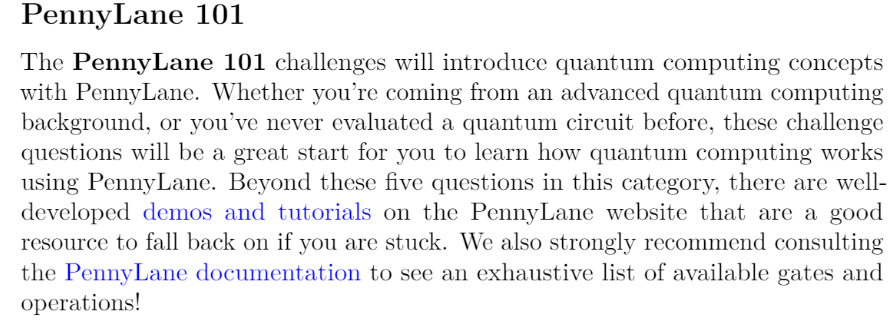

# 300 Points

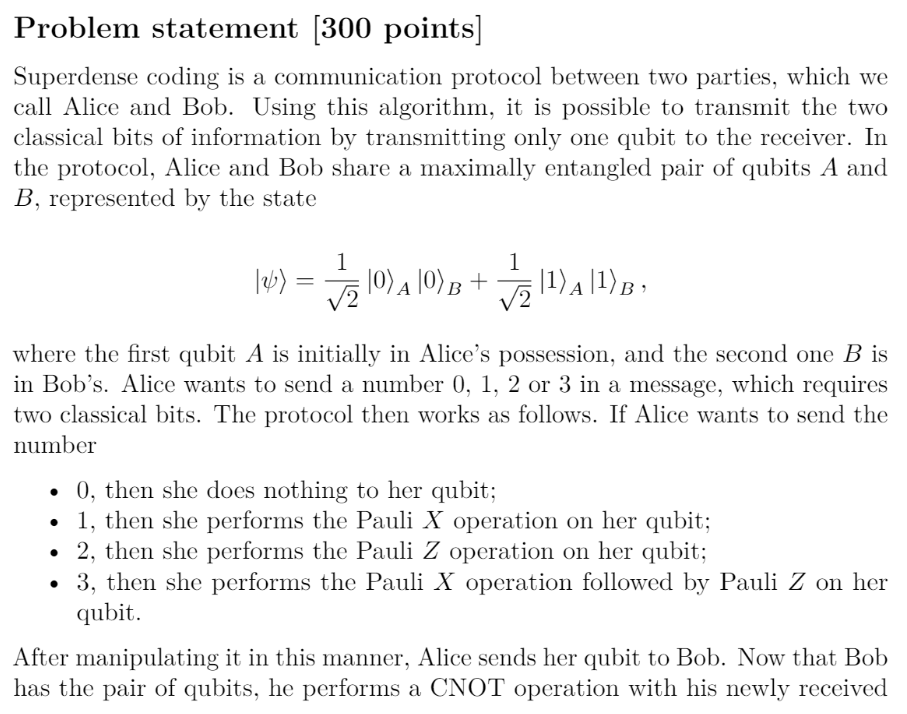

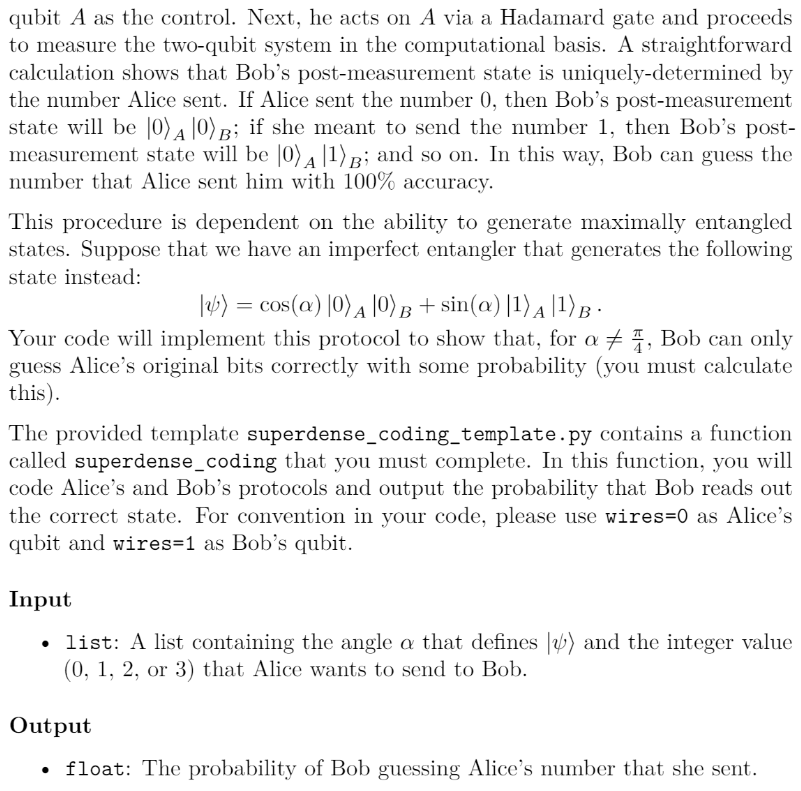

In [2]:
import sys
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def superdense_coding(bits, alpha):
    """Construct a quantum circuit that implements superdense coding, given a not necessarily maximally entangled state
    Args:
        - bits (int): 0 (binary: 00), 1 (binary: 01), 2 (binary: 10), or 3 (binary: 11), Alice's bits that she wants to communicate to Bob.
        - alpha (float): angle parametrizing the entangled state
    Returns:
        - (np.tensor): Probability that Bob will guess Alice's bits correctly
    """

    # QHACK #

    # Prepare entangled state here
    state = np.array([np.cos(alpha), 0,0,np.sin(alpha)])
    qml.MottonenStatePreparation(state_vector = state, wires = range(2))

    # Implement Alice's operations on her qubit here
    if bits == 1:
        qml.PauliX(wires=0)
    if bits == 2:
        qml.PauliZ(wires=0)
    if bits == 3:
        qml.PauliX(wires=0)
        qml.PauliZ(wires=0)


    # Implement Bob's measurement procedure here
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)

    # QHACK #

    return qml.probs(wires=[0, 1])

def return_probs(bits, alpha):
    """Returns the output of the superdense_coding function for a given index (bits)"""
    # DO NOT MODIFY anything in this code block
    return superdense_coding(bits, alpha)[bits].numpy()

inputs = [0,0.7854]
output = return_probs(int(inputs[0]), float(inputs[1]))
print(f"Obtained answer: {output:.6f}")
print('Expected answer: 1.0')



Obtained answer: 1.000000
Expected answer: 1.0


# 400 Points

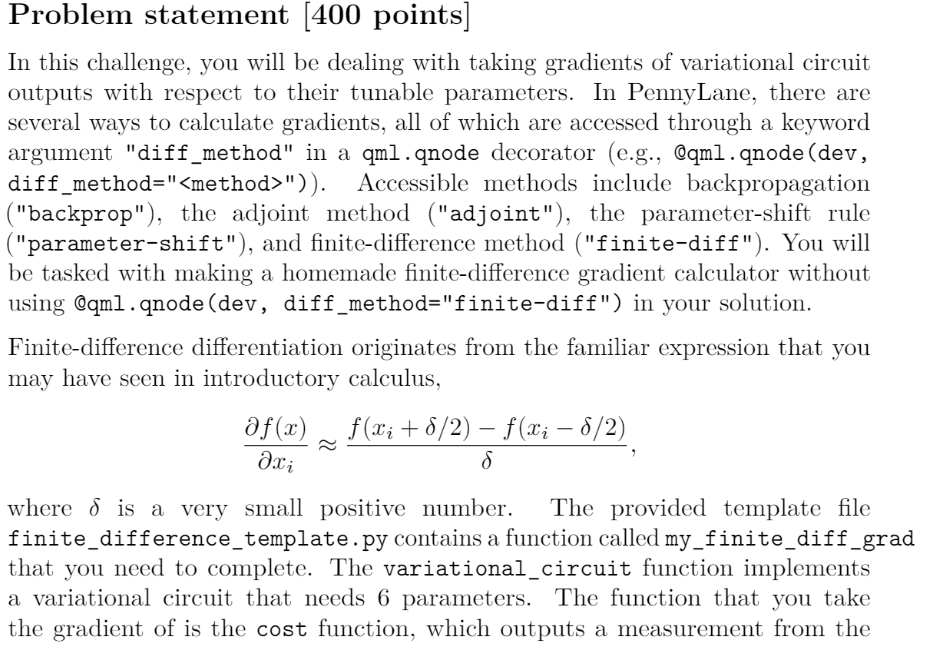

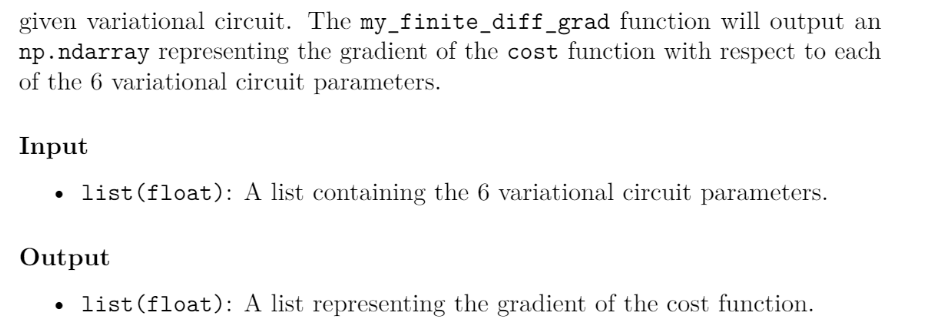

In [4]:
import sys
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=3)


def my_finite_diff_grad(params):
    """Function that returns the gradients of the cost function (defined below) with respect
    to all parameters in params.
    Args:
        - params (np.ndarray): The parameters needed to create the variational circuit.
    Returns:
        - gradients (np.ndarray): the gradient w.r.t. each parameter
    """

    gradients = np.zeros([len(params)])
    for i in range(len(params)):
        # QHACK #
        params[i] = params[i]*1.00001
        cost1 = cost(params)
        params[i] = params[i]*0.99999/1.00001
        cost2 = cost(params)
        gradients[i] = (cost1-cost2)/(0.00002*params[i])
        params[i] = params[i]/0.99999
        # QHACK #

    return gradients


def variational_circuit(params):
    """A layered variational circuit. The first layer comprises of x, y, and z rotations on wires
    0, 1, and 2, respectively. The second layer is a ring of CNOT gates. The final layer comprises
    of x, y, and z rotations on wires 0, 1, and 2, respectively.
    """

    # DO NOT MODIFY anything in this code block
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RZ(params[2], wires=2)

    qml.broadcast(qml.CNOT, wires=[0, 1, 2], pattern="ring")

    qml.RX(params[3], wires=0)
    qml.RY(params[4], wires=1)
    qml.RZ(params[5], wires=2)

    qml.broadcast(qml.CNOT, wires=[0, 1, 2], pattern="ring")


@qml.qnode(dev)
def cost(params):
    """A QNode that pairs the variational_circuit with an expectation value measurement.
    Args:
        - params (np.ndarray): Variational circuit parameters
    Returns:
        - (float): qml.expval(qml.PauliY(0) @ qml.PauliZ(2))
    """

    # DO NOT MODIFY anything in this code block
    variational_circuit(params)
    return qml.expval(qml.PauliY(0) @ qml.PauliZ(2))


params = np.array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864, 0.15599452])
output = my_finite_diff_grad(params)
print('Obtained answer', *output, sep=",")
print('Expected answer: -0.06518877,-0.02728919,-0.0,-0.09339346,-0.76106754,0.0')

Obtained answer,-0.06518942456980814,-0.027289463357173836,-2.843860958824398e-12,-0.09339439607608183,-0.7610751811608534,2.2241048254580236e-11
Expected answer: -0.06518877,-0.02728919,-0.0,-0.09339346,-0.76106754,0.0


# 500 Points

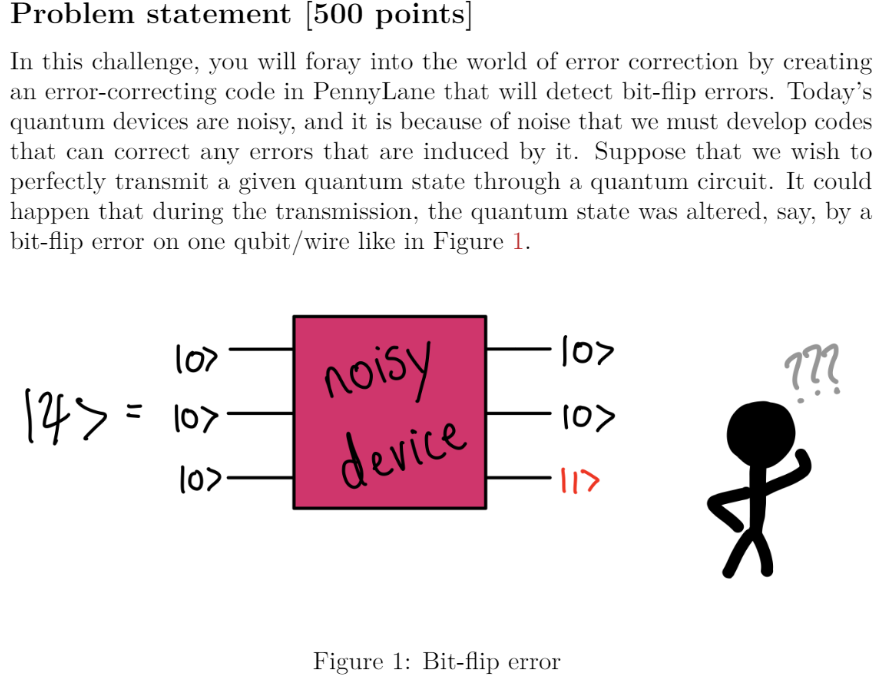

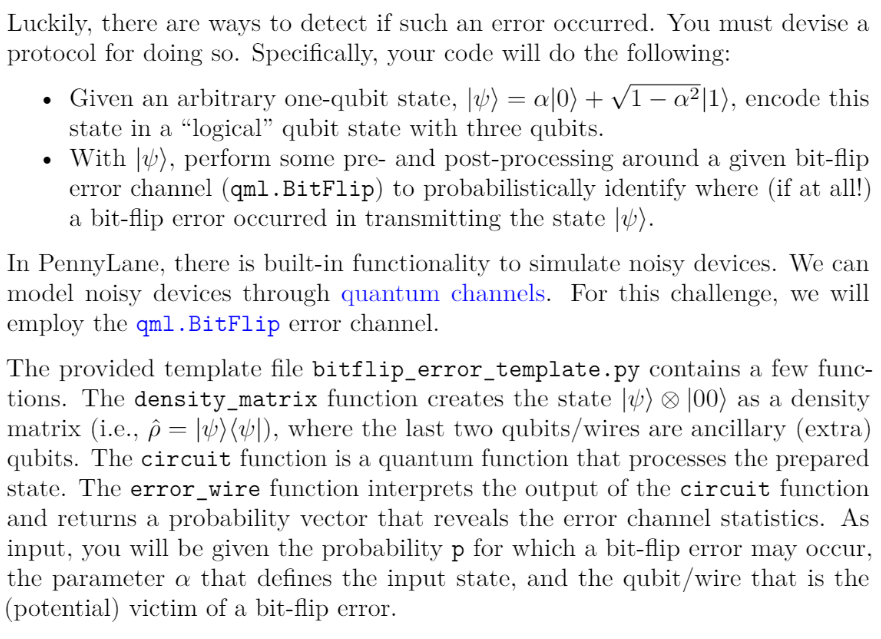

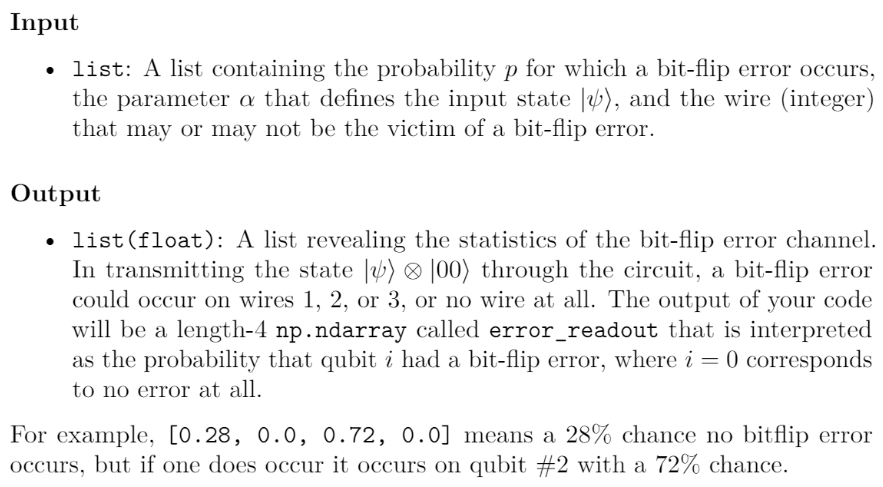

In [6]:
import sys
import pennylane as qml
from pennylane import numpy as np


def error_wire(circuit_output):
    """Function that returns an error readout.
    Args:
        - circuit_output (?): the output of the `circuit` function.
    Returns:
        - (np.ndarray): a length-4 array that reveals the statistics of the
        error channel. It should display your algorithm's statistical prediction for
        whether an error occurred on wire `k` (k in {1,2,3}). The zeroth element represents
        the probability that a bitflip error does not occur.
        e.g., [0.28, 0.0, 0.72, 0.0] means a 28% chance no bitflip error occurs, but if one
        does occur it occurs on qubit #2 with a 72% chance.
    """

    # QHACK #
    c = np.abs(circuit_output)
    res = np.array([c[7][7]+c[0][0],c[3][3]+c[4][4],c[2][2]+c[5][5],c[1][1]+c[6][6]])
    # process the circuit output here and return which qubit was the victim of a bitflip error!

    # QHACK #
    return res

dev = qml.device("default.mixed", wires=3)


@qml.qnode(dev)
def circuit(p, alpha, tampered_wire):
    """A quantum circuit that will be able to identify bitflip errors.
    DO NOT MODIFY any already-written lines in this function.
    Args:
        p (float): The bit flip probability
        alpha (float): The parameter used to calculate `density_matrix(alpha)`
        tampered_wire (int): The wire that may or may not be flipped (zero-index)
    Returns:
        Some expectation value, state, probs, ... you decide!
    """

    qml.QubitDensityMatrix(density_matrix(alpha), wires=[0, 1, 2])

    # QHACK #

    # put any input processing gates here
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])

    qml.BitFlip(p, wires=int(tampered_wire))

    return qml.state()
    # put any gates here after the bitflip error has occurred

    # return something!
    # QHACK #



def density_matrix(alpha):
    """Creates a density matrix from a pure state."""
    # DO NOT MODIFY anything in this code block
    psi = alpha * np.array([1, 0], dtype=float) + np.sqrt(1 - alpha**2) * np.array(
        [0, 1], dtype=float
    )
    psi = np.kron(psi, np.array([1, 0, 0, 0], dtype=float))
    return np.outer(psi, np.conj(psi))


inputs = np.array([0.8, 0.1234, 0])
p, alpha, tampered_wire = inputs[0], inputs[1], int(inputs[2])

error_readout = np.zeros(4, dtype=float)
circuit_output = circuit(p, alpha, tampered_wire)
error_readout = error_wire(circuit_output)

print('Obtained answer:',*error_readout, sep=",")
print('Expected answer:,0.19999999999999993,0.7999999999999999,0.0,0.0')

Obtained answer:,0.19999999999999993,0.7999999999999999,0.0,0.0
Expected answer:,0.19999999999999993,0.7999999999999999,0.0,0.0
